In [85]:
from Library.DataAnalyzer import DataAnalyzer
from Library.DataPreprocessor import DataPreprocessor
from Library.DataVisualizer import DataVisualizer

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split

import pandas as pd

In [86]:
preprocessor = DataPreprocessor()
analyzer = DataAnalyzer()
visualizer = DataVisualizer()

# Read File

In [87]:
df = pd.read_csv("Data/kc_house_data.csv")

# Exploratory Data Analysis

In [88]:
df.shape

(21613, 21)

In [89]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [90]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [92]:
analyzer.calculateNullValuesSum(df)

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [93]:
df.sample(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
10145,3211800140,20150205T000000,493500.0,3,1.75,1800,16026,1.0,0,0,...,8,1390,410,1972,0,98008,47.5815,-122.121,2210,13959
3500,2288000090,20150429T000000,980000.0,4,1.75,2260,17711,1.0,0,1,...,9,2260,0,1968,0,98040,47.5498,-122.214,2880,16594
12239,7852011040,20140521T000000,589000.0,4,2.50,2910,5776,2.0,0,2,...,8,2910,0,1998,0,98065,47.5388,-121.870,2550,6750
9430,6117501755,20141230T000000,355000.0,4,1.50,2230,11536,1.0,0,1,...,7,1220,1010,1954,0,98166,47.4409,-122.348,2170,12465
4269,3546000090,20150224T000000,199500.0,3,1.75,1690,8901,1.0,0,0,...,7,1690,0,1986,0,98030,47.3546,-122.176,1690,7532


In [94]:
df.zipcode = df.zipcode.astype("category") 

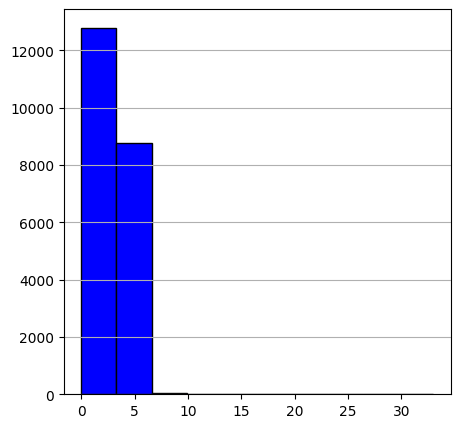

In [95]:
visualizer.draw_histogram_chart(df["bedrooms"], 10, figure_height=5, figure_width=5)

In [96]:
df = preprocessor.removeOutliersByQuantile(df, "bedrooms", 0.01, 0.99)

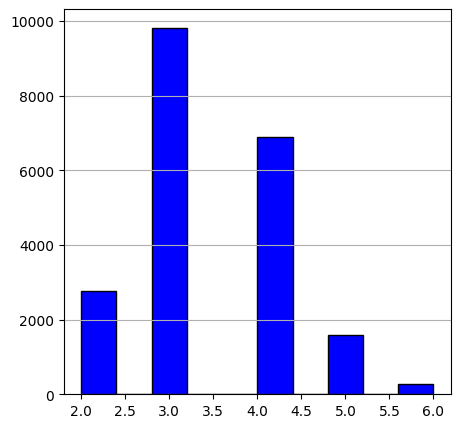

In [97]:
visualizer.draw_histogram_chart(df["bedrooms"], 10, figure_height= 5, figure_width= 5)

In [98]:
df["bedrooms"].value_counts()

3    9824
4    6882
2    2760
5    1601
6     272
Name: bedrooms, dtype: int64

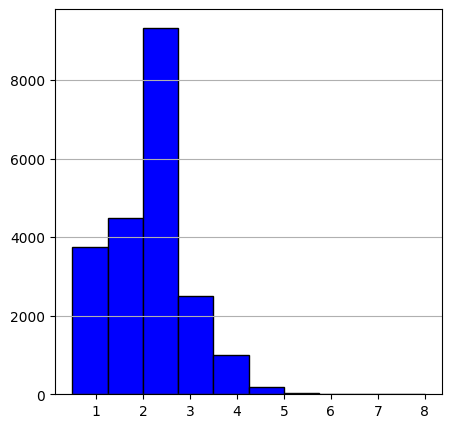

In [99]:
visualizer.draw_histogram_chart(df["bathrooms"], 10, figure_height= 5, figure_width= 5)

In [100]:
df = preprocessor.removeOutliersByQuantile(df, "bathrooms", 0.01, 0.95)

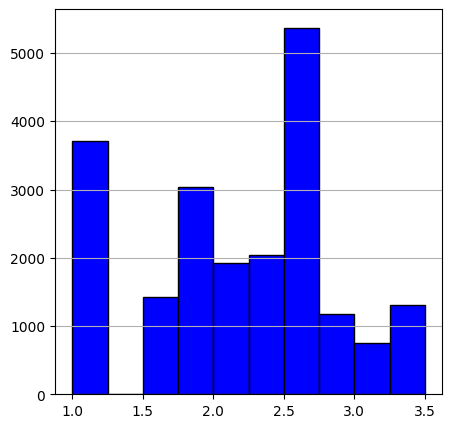

In [101]:
visualizer.draw_histogram_chart(df["bathrooms"], 10, figure_height= 5, figure_width= 5)

In [102]:
df = preprocessor.addColumnWithValue(df, "age", 2022-df["yr_built"])

In [103]:
# import numpy as np
# df["basement"] = np.where(df["sqft_basement"] > 0, 1, 0)

In [104]:
df = preprocessor.updateColumnValuesBasedOnCondition(df, "sqft_basement", "equals", 0, 0, 1)
df = preprocessor.renameOrTransformColumnNames(df, old_name="sqft_basement", new_name="basement")

In [105]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,age
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,67
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,2170,1,1951,1991,98125,47.7210,-122.319,1690,7639,71
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,89
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,1050,1,1965,0,98136,47.5208,-122.393,1360,5000,57
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21606,7936000429,20150326T000000,1007500.0,4,3.50,3510,7200,2.0,0,0,...,2600,1,2009,0,98136,47.5537,-122.398,2050,6200,13
21607,2997800021,20150219T000000,475000.0,3,2.50,1310,1294,2.0,0,0,...,1180,1,2008,0,98116,47.5773,-122.409,1330,1265,14
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,13
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,8


In [106]:
df = preprocessor.updateColumnValuesBasedOnCondition(df, "yr_renovated", "equals", 0, 0, 1)
df = preprocessor.renameOrTransformColumnNames(df, old_name="yr_renovated", new_name="renovated")

In [107]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,basement,yr_built,renovated,zipcode,lat,long,sqft_living15,sqft_lot15,age
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,67
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,2170,1,1951,1,98125,47.7210,-122.319,1690,7639,71
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,89
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,1050,1,1965,0,98136,47.5208,-122.393,1360,5000,57
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21606,7936000429,20150326T000000,1007500.0,4,3.50,3510,7200,2.0,0,0,...,2600,1,2009,0,98136,47.5537,-122.398,2050,6200,13
21607,2997800021,20150219T000000,475000.0,3,2.50,1310,1294,2.0,0,0,...,1180,1,2008,0,98116,47.5773,-122.409,1330,1265,14
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,13
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,8


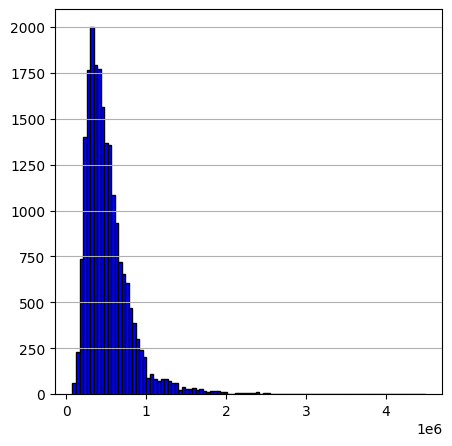

In [108]:
visualizer.draw_histogram_chart(df["price"], 100, figure_height= 5, figure_width= 5)

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20763 entries, 0 to 21611
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   id             20763 non-null  int64   
 1   date           20763 non-null  object  
 2   price          20763 non-null  float64 
 3   bedrooms       20763 non-null  int64   
 4   bathrooms      20763 non-null  float64 
 5   sqft_living    20763 non-null  int64   
 6   sqft_lot       20763 non-null  int64   
 7   floors         20763 non-null  float64 
 8   waterfront     20763 non-null  int64   
 9   view           20763 non-null  int64   
 10  condition      20763 non-null  int64   
 11  grade          20763 non-null  int64   
 12  sqft_above     20763 non-null  int64   
 13  basement       20763 non-null  int32   
 14  yr_built       20763 non-null  int64   
 15  renovated      20763 non-null  int32   
 16  zipcode        20763 non-null  category
 17  lat            20763 non-null  

In [110]:
df = preprocessor.dropColumnsFromDataFrame(df, ["id", "lat", "long", "date"])

In [111]:
df = preprocessor.changeColumnDataType(df, "price", int)

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20763 entries, 0 to 21611
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   price          20763 non-null  int32   
 1   bedrooms       20763 non-null  int64   
 2   bathrooms      20763 non-null  float64 
 3   sqft_living    20763 non-null  int64   
 4   sqft_lot       20763 non-null  int64   
 5   floors         20763 non-null  float64 
 6   waterfront     20763 non-null  int64   
 7   view           20763 non-null  int64   
 8   condition      20763 non-null  int64   
 9   grade          20763 non-null  int64   
 10  sqft_above     20763 non-null  int64   
 11  basement       20763 non-null  int32   
 12  yr_built       20763 non-null  int64   
 13  renovated      20763 non-null  int32   
 14  zipcode        20763 non-null  category
 15  sqft_living15  20763 non-null  int64   
 16  sqft_lot15     20763 non-null  int64   
 17  age            20763 non-null  

In [113]:
df.view.value_counts()

0    18856
2      886
3      452
1      311
4      258
Name: view, dtype: int64

In [114]:
df = preprocessor.removeOutliersByQuantile(df, "price", 0.01, 0.97)

In [115]:
df = preprocessor.removeOutliersByQuantile(df, "sqft_living", 0.01, 0.97)

In [116]:
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,basement,yr_built,renovated,zipcode,sqft_living15,sqft_lot15,age
0,221900,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,1340,5650,67
1,538000,3,2.25,2570,7242,2.0,0,0,3,7,2170,1,1951,1,98125,1690,7639,71
2,180000,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,2720,8062,89
3,604000,4,3.00,1960,5000,1.0,0,0,5,7,1050,1,1965,0,98136,1360,5000,57
4,510000,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,1800,7503,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21606,1007500,4,3.50,3510,7200,2.0,0,0,3,9,2600,1,2009,0,98136,2050,6200,13
21607,475000,3,2.50,1310,1294,2.0,0,0,3,8,1180,1,2008,0,98116,1330,1265,14
21608,360000,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,1530,1509,13
21609,400000,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,1830,7200,8


In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19149 entries, 0 to 21611
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   price          19149 non-null  int32   
 1   bedrooms       19149 non-null  int64   
 2   bathrooms      19149 non-null  float64 
 3   sqft_living    19149 non-null  int64   
 4   sqft_lot       19149 non-null  int64   
 5   floors         19149 non-null  float64 
 6   waterfront     19149 non-null  int64   
 7   view           19149 non-null  int64   
 8   condition      19149 non-null  int64   
 9   grade          19149 non-null  int64   
 10  sqft_above     19149 non-null  int64   
 11  basement       19149 non-null  int32   
 12  yr_built       19149 non-null  int64   
 13  renovated      19149 non-null  int32   
 14  zipcode        19149 non-null  category
 15  sqft_living15  19149 non-null  int64   
 16  sqft_lot15     19149 non-null  int64   
 17  age            19149 non-null  

In [118]:
analyzer.sortCorrelationsWithColumn(df, "price")

price            1.000000
grade            0.585814
sqft_living      0.565185
sqft_living15    0.512829
sqft_above       0.451562
bathrooms        0.376609
view             0.255562
bedrooms         0.238506
floors           0.228472
basement         0.152852
renovated        0.100862
waterfront       0.082365
sqft_lot         0.064290
condition        0.056752
sqft_lot15       0.053074
age              0.016708
yr_built         0.016708
Name: price, dtype: float64

In [119]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'basement',
       'yr_built', 'renovated', 'zipcode', 'sqft_living15', 'sqft_lot15',
       'age'],
      dtype='object')

In [120]:
x = df[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'basement',
       'yr_built', 'renovated', 'zipcode', 'sqft_living15', 'sqft_lot15',
       'age']]
y = df[["price"]]
x = pd.get_dummies(x, drop_first=True)

In [121]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state= 13) 

In [122]:
model = Sequential()

model.add(Dense(19, activation= "relu"))
model.add(Dense(19, activation= "relu"))
model.add(Dense(19, activation= "relu"))
model.add(Dense(19, activation= "relu"))
model.add(Dense(1))
model.compile(optimizer= "Adam", loss= "mse")

In [123]:
model.fit(x = x_train, y= y_train, validation_data= (x_test, y_test), batch_size= 128, epochs= 3000)
model.summary()

Epoch 1/3000
120/120 [==============================] - 1s 4ms/step - loss: 245602222080.0000 - val_loss: 191916097536.0000
Epoch 2/3000
120/120 [==============================] - 0s 3ms/step - loss: 154623524864.0000 - val_loss: 84257579008.0000
Epoch 3/3000
120/120 [==============================] - 0s 3ms/step - loss: 41686728704.0000 - val_loss: 30820945920.0000
Epoch 4/3000
120/120 [==============================] - 0s 2ms/step - loss: 29963186176.0000 - val_loss: 29617707008.0000
Epoch 5/3000
120/120 [==============================] - 0s 3ms/step - loss: 29228994560.0000 - val_loss: 29199843328.0000
Epoch 6/3000
120/120 [==============================] - 0s 2ms/step - loss: 28762636288.0000 - val_loss: 28844724224.0000
Epoch 7/3000
120/120 [==============================] - 0s 2ms/step - loss: 28561426432.0000 - val_loss: 28696512512.0000
Epoch 8/3000
120/120 [==============================] - 0s 2ms/step - loss: 28230371328.0000 - val_loss: 28476932096.0000
Epoch 9/3000
120/120 

In [124]:
predict = model.predict(x_test) 

120/120 [==============================] - 0s 895us/step


In [125]:
(mean_squared_error(y_test, predict))**.5 

83579.94523153733

In [126]:
r2_score(y_test,predict)

0.8331266839114195